In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [735]:
df_US_ml= pd.read_csv('df_US_ml.csv')
df_US_ml= df_US_ml.drop("Unnamed: 0",axis=1)

In [736]:
df_US_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75015 entries, 0 to 75014
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aircraft.damage        75015 non-null  object
 1   Aircraft.Category      75015 non-null  object
 2   Amateur.Built          75015 non-null  object
 3   Number.of.Engines      75015 non-null  object
 4   Engine.Type            75015 non-null  object
 5   Purpose.of.flight      75015 non-null  object
 6   Weather.Condition      75015 non-null  object
 7   Broad.phase.of.flight  75015 non-null  object
 8   Month.Abbr             75015 non-null  object
 9   Day.Name.Abbr          75015 non-null  object
 10  Make_class             75015 non-null  object
 11  Airport_Class          75015 non-null  object
 12  Target_binary          75015 non-null  object
 13  Target_column          75015 non-null  object
 14  Total_passangers       75015 non-null  int64 
 15  Aircraft_size      

In [737]:
df_US_ml.head()

,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Month.Abbr,Day.Name.Abbr,Make_class,Airport_Class,Target_binary,Target_column,Total_passangers,Aircraft_size,State_mod
0,Substantial,Airplane,No,one,Reciprocating,Personal,VMC,Approach,Jan,Sat,Cessna,Airport,Minor_Uninjured,Injured,4,medium,OR
1,Substantial,Airplane,No,one,Reciprocating,Personal,VMC,Landing,Jan,Sat,Cessna,Airport,Minor_Uninjured,Uninjured,2,medium,IA
2,Substantial,Airplane,No,one,Reciprocating,Personal,VMC,Takeoff,Jan,Sat,Cessna,Airport,Minor_Uninjured,Uninjured,1,medium,MO
3,Substantial,Airplane,No,one,Reciprocating,Personal,VMC,Approach,Jan,Sat,Piper,Airport,Minor_Uninjured,Injured,2,medium,CA
4,Substantial,Airplane,No,one,Reciprocating,Instructional,VMC,Landing,Jan,Sat,Cessna,None,Minor_Uninjured,Uninjured,2,small,WI


In [733]:
df_US_ml.columns

Index(['Aircraft.damage', 'Aircraft.Category', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Weather.Condition', 'Broad.phase.of.flight', 'Month.Abbr',
       'Day.Name.Abbr', 'Make_class', 'Airport_Class', 'Target_binary',
       'Target_column', 'Total_passangers', 'Aircraft_size', 'State_mod'],
      dtype='object')

### first dataset with Aircraft Damage as target column

In [738]:
df_US_ml['Aircraft.damage'].value_counts(normalize =True)

Substantial    0.772392
Destroyed      0.202773
Minor          0.024835
Name: Aircraft.damage, dtype: float64

In [739]:
df_US_ml = df_US_ml[df_US_ml['Aircraft.damage']!='UNKNOWN']

In [740]:
df_US_ml['Aircraft.damage'].value_counts()

Substantial    57941
Destroyed      15211
Minor           1863
Name: Aircraft.damage, dtype: int64

In [169]:
y1=df_US_ml['Aircraft.damage']

In [170]:
y1.shape

(75015,)

In [171]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
y1_label = le.fit_transform(y1)

In [285]:
y1_label.max()

2

In [172]:
X1 = df_US_ml.drop(columns = ['Aircraft.damage','Target_binary', 'Target_column'], axis=1)

In [173]:
X1.shape

(75015, 14)

In [174]:
X1.columns

Index(['Aircraft.Category', 'Amateur.Built', 'Number.of.Engines',
       'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
       'Broad.phase.of.flight', 'Month.Abbr', 'Day.Name.Abbr', 'Make_class',
       'Airport_Class', 'Total_passangers', 'Aircraft_size', 'State_mod'],
      dtype='object')

In [175]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75015 entries, 3601 to 88886
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aircraft.Category      75015 non-null  object
 1   Amateur.Built          75015 non-null  object
 2   Number.of.Engines      75015 non-null  object
 3   Engine.Type            75015 non-null  object
 4   Purpose.of.flight      75015 non-null  object
 5   Weather.Condition      75015 non-null  object
 6   Broad.phase.of.flight  75015 non-null  object
 7   Month.Abbr             75015 non-null  object
 8   Day.Name.Abbr          75015 non-null  object
 9   Make_class             75015 non-null  object
 10  Airport_Class          75015 non-null  object
 11  Total_passangers       75015 non-null  int32 
 12  Aircraft_size          75015 non-null  object
 13  State_mod              75015 non-null  object
dtypes: int32(1), object(13)
memory usage: 8.3+ MB


In [176]:
X1_dummies=pd.get_dummies(X1)

In [177]:
X1_dummies.columns

Index(['Total_passangers', 'Aircraft.Category_Airplane',
       'Aircraft.Category_Helicopter', 'Aircraft.Category_UNKNOWN',
       'Amateur.Built_No', 'Amateur.Built_UNKNOWN', 'Amateur.Built_Yes',
       'Number.of.Engines_UNKNOWN', 'Number.of.Engines_one',
       'Number.of.Engines_three_to_four',
       ...
       'State_mod_SD', 'State_mod_TN', 'State_mod_TX', 'State_mod_UT',
       'State_mod_VA', 'State_mod_VT', 'State_mod_WA', 'State_mod_WI',
       'State_mod_WV', 'State_mod_WY'],
      dtype='object', length=161)

In [178]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_dummies, y1_label, test_size=0.2, random_state=101, stratify=y1_label)

### 1) Random Forest for Aircraft Damage with 3 classes

In [741]:
from sklearn.ensemble import RandomForestClassifier

In [742]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y1_train)

In [745]:
model1_rf=RandomForestClassifier(n_estimators=500, max_features='auto', class_weight="balanced_subsample", random_state =101, )

In [746]:
model1_rf.fit(X1_train, y1_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       random_state=101)

In [184]:
model1_rf.feature_importances_

array([0.07786477, 0.00705596, 0.0039583 , 0.00648682, 0.00424666,
       0.00019794, 0.00374525, 0.00215017, 0.03952569, 0.00442925,
       0.01686538, 0.01663504, 0.01359281, 0.00236239, 0.00472163,
       0.0027743 , 0.00317691, 0.00283496, 0.00134844, 0.00546507,
       0.00185481, 0.00084158, 0.00802324, 0.00307866, 0.0196512 ,
       0.00405679, 0.00203915, 0.04459896, 0.01641773, 0.00211676,
       0.01549327, 0.00847505, 0.0048381 , 0.00927012, 0.00360086,
       0.00282723, 0.02199334, 0.02152775, 0.00874842, 0.01079352,
       0.01315534, 0.01544024, 0.01021229, 0.01161275, 0.00838926,
       0.00884969, 0.00725774, 0.01302821, 0.01164751, 0.00939054,
       0.01135752, 0.00902592, 0.01018059, 0.01050674, 0.01358325,
       0.01241141, 0.01487304, 0.01442559, 0.01368128, 0.01198119,
       0.01280177, 0.00082953, 0.00083261, 0.00063186, 0.00096621,
       0.00045859, 0.00039333, 0.00039617, 0.00613005, 0.00270929,
       0.0046156 , 0.01218779, 0.00085913, 0.00154643, 0.00101

In [747]:
preds1_rf = model1_rf.predict(X1_test)

In [748]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, balanced_accuracy_score, roc_curve, roc_auc_score, precision_recall_curve

In [749]:
balanced_accuracy_score(y1_test, preds1_rf)

0.49955670818667386

In [ ]:
preds1_rf

In [750]:
print('Accuracy Score: ', accuracy_score(y1_test,preds1_rf))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_test, preds1_rf))
print('Confusion Matrix: \n', confusion_matrix(y1_test, preds1_rf))
print('Classification Report: \n', classification_report(y1_test, preds1_rf))

Accuracy Score:  0.792241551689662
Balanced_accuracy Score:  0.49955670818667386
Confusion Matrix: 
 [[  902     8  2132]
 [   10    98   265]
 [  645    57 10886]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.30      0.39      3042
           1       0.60      0.26      0.37       373
           2       0.82      0.94      0.88     11588

    accuracy                           0.79     15003
   macro avg       0.67      0.50      0.54     15003
weighted avg       0.77      0.79      0.76     15003



In [189]:
print(classification_report(y1_test, preds1_rf))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39      3042
           1       0.61      0.28      0.39       373
           2       0.82      0.93      0.87     11588

    accuracy                           0.79     15003
   macro avg       0.66      0.51      0.55     15003
weighted avg       0.76      0.79      0.76     15003



<AxesSubplot:>

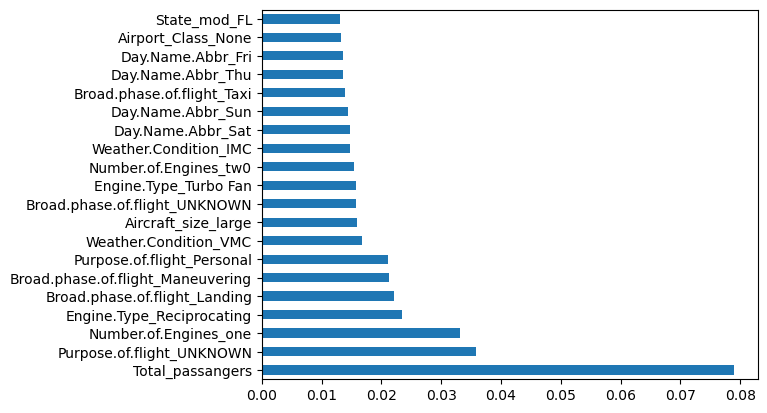

In [751]:
(pd.Series(model1_rf.feature_importances_, index=X1_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

In [752]:
pred1_rf_train_proba = model1_rf.predict_proba(X1_train)[:,1]
pred1_rf_test_proba = model1_rf.predict_proba(X1_test)[:,1]

In [ ]:
pred1_rf_train_proba

In [ ]:
y1_train

In [753]:
from sklearn.metrics import roc_auc_score, roc_curve

In [754]:
roc_auc_score(y1_train,pred1_rf_train_proba, multi_class='ovr')

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
roc_auc_score(y1_test,pred1_rf_test_proba,multi_class='ovr')

In [ ]:
fpr_train, tpr_train, thresholds =  roc_curve(y1_train,pred1_rf_train_proba)
fpr_test, tpr_test, thresholds = roc_curve(y1_test,pred1_rf_test_proba)

### RF wit grid searchCV

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
n_estimators=[50,150,300]
max_features = [3,5]
bootstrap = [True,False]
oob_score=[True,False]

In [192]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

NameError: name 'n_estimators' is not defined

In [ ]:
model1_rf1=RandomForestClassifier()

In [ ]:
grid1_rf1 = GridSearchCV(model1_rf1, param_grid)

In [ ]:
grid1_rf1.fit(X1_train, y1_train)

In [ ]:
grid1_rf1.best_params_

In [ ]:
pred1_gscv_rf = grid1_rf1.predict(X1_test)

In [ ]:
y1_test

In [ ]:
pred1_gscv_rf

In [ ]:
pred1_gscv_rf = le.fit_transform(pred1_gscv_rf)

In [ ]:
print(classification_report(y1_test,pred1_gscv_rf))

In [ ]:
grid1_rf1.best_estimator_.oob_score_

In [ ]:
print('Accuracy Score: ', accuracy_score(y1_test,pred1_gscv_rf))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_test, pred1_gscv_rf))
print('Confusion Matrix: \n', confusion_matrix(y1_test, pred1_gscv_rf))
print('Classification Report: \n', classification_report(y1_test, pred1_gscv_rf))

In [ ]:
feat_import = grid1_rf1.best_estimator_.feature_importances_

In [ ]:
(pd.Series(feat_import, index=X1_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

### Balanced Random Forest

In [755]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [757]:
model1_brf=RandomForestClassifier(n_estimators=500, max_features='auto', class_weight="balanced_subsample", random_state =101, )

In [758]:
model1_brf.fit(X1_train, y1_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       random_state=101)

In [759]:
preds1_brf = model1_brf.predict(X1_test)

In [760]:
print('Accuracy Score: ', accuracy_score(y1_test,preds1_brf))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_test, preds1_brf))
print('Confusion Matrix: \n', confusion_matrix(y1_test, preds1_rf))
print('Classification Report: \n', classification_report(y1_test, preds1_brf))

Accuracy Score:  0.792241551689662
Balanced_accuracy Score:  0.49955670818667386
Confusion Matrix: 
 [[  902     8  2132]
 [   10    98   265]
 [  645    57 10886]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.30      0.39      3042
           1       0.60      0.26      0.37       373
           2       0.82      0.94      0.88     11588

    accuracy                           0.79     15003
   macro avg       0.67      0.50      0.54     15003
weighted avg       0.77      0.79      0.76     15003



#### XG BOOST

In [207]:
import xgboost as xgb
import time

In [229]:
from sklearn.metrics import confusion_matrix, classification_report, 
plot_confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve

In [240]:
X1_train.shape

(60012, 161)

In [241]:
X1_test.shape

(15003, 161)

In [244]:
y1_test.shape

(15003,)

In [367]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y1_train)

In [287]:
classes_weights.max()

13.421900161030596

In [288]:
classes_weights.min()

0.4315596900295128

In [368]:
X1_1_train, X1_val, y1_1_train, y1_val = train_test_split(X1_train, y1_train, train_size=0.6, random_state=101)

In [390]:
X1_1_train.shape

(36007, 161)

In [392]:
X1_val.shape

(24005, 161)

In [393]:
y1_1_train.shape

(36007,)

In [394]:
y1_val.shape

(24005,)

In [369]:
eval_set = [(X1_1_train, y1_1_train), (X1_val, y1_val)]
eval_metric = ['merror','mlogloss','auc']

In [372]:
model1_xgb = xgb.XGBClassifier(n_estimators = 1000, max_depth =5,num_class=3,
                               objective='multi:softprob',early_stopping_rounds=10,eval_metric=eval_metric)

In [ ]:
#early_stopping_rounds=10

In [373]:
start =time.time()

model1_xgb.fit(X1_train, y1_train, eval_set=eval_set, 
              sample_weight=classes_weights, verbose = 0)

end = time.time()
print("time: ", end -start)

time:  239.0308496952057


In [335]:
model1_xgb.score

<bound method ClassifierMixin.score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softprob', ...)>

In [374]:
results = model1_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

In [407]:
results

{'validation_0': OrderedDict([('merror',
               [0.4525508928819396,
                0.35520870941761323,
                0.3458494181686894,
                0.34332213180770405,
                0.3480712083761491,
                0.3558474741022579,
                0.34926542061265864,
                0.3402949426500403,
                0.3462382314549949,
                0.345460604882384,
                0.3493487377454384,
                0.343433221318077,
                0.350098591940456,
                0.34918210347987894,
                0.3497653234093371,
                0.3507095842475074,
                0.34998750243008303,
                0.34993195767489654,
                0.35023745382842225,
                0.3508762185130669,
                0.34998750243008303,
                0.3514872108201183,
                0.34809898075374235,
                0.3486544283056072,
                0.34782125697780986,
                0.3472935818035382,
                

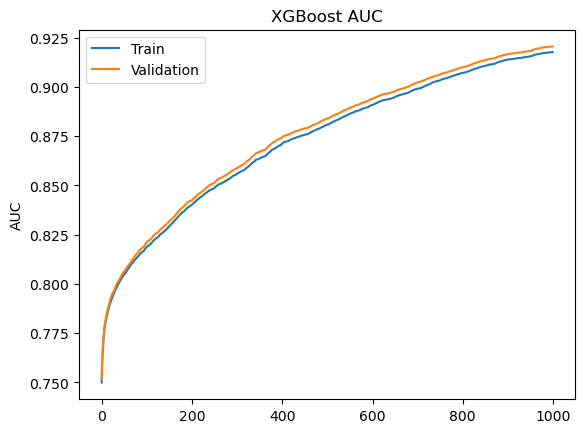

In [375]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

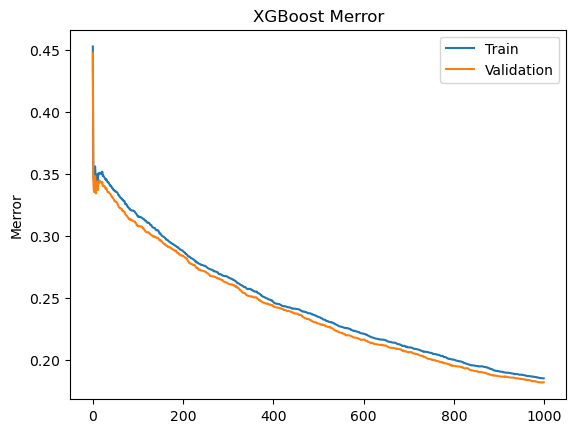

In [376]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Merror')
plt.title('XGBoost Merror')
plt.show()

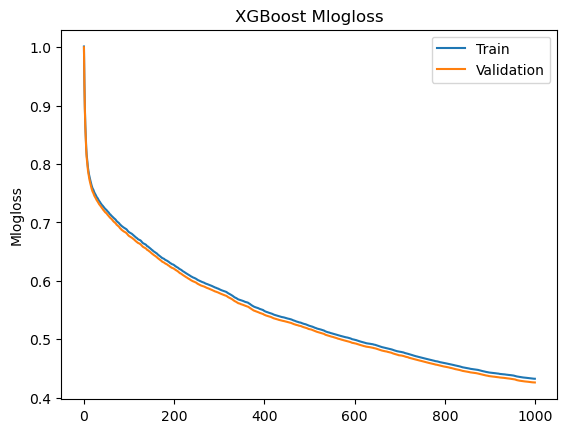

In [377]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Mlogloss')
plt.title('XGBoost Mlogloss')
plt.show()

In [378]:
model1_xgb.eval_metric

['merror', 'mlogloss', 'auc']

In [379]:
probas = model1_xgb.predict_proba(X1_test)

In [327]:
probas

array([[6.9055593e-01, 5.0231176e-03, 3.0442098e-01],
       [4.6587068e-01, 3.0924595e-04, 5.3382003e-01],
       [1.6344912e-01, 2.6736836e-05, 8.3652413e-01],
       ...,
       [5.4057371e-02, 2.6105475e-04, 9.4568157e-01],
       [9.0980679e-02, 1.2487636e-04, 9.0889448e-01],
       [2.4173693e-01, 5.4393470e-04, 7.5771910e-01]], dtype=float32)

In [380]:
pred1_xgb = model1_xgb.predict(X1_test)

In [381]:
accuracy_score(y1_test, pred1_xgb)

0.7089915350263281

In [382]:
print(classification_report(y1_test, pred1_xgb))

              precision    recall  f1-score   support

           0       0.41      0.63      0.50      3042
           1       0.29      0.41      0.34       373
           2       0.88      0.74      0.80     11588

    accuracy                           0.71     15003
   macro avg       0.52      0.59      0.55     15003
weighted avg       0.77      0.71      0.73     15003



In [331]:
model1_xgb.feature_importances_

array([0.00651224, 0.00336531, 0.00748246, 0.00916993, 0.00747725,
       0.00288856, 0.00623482, 0.00529616, 0.05990287, 0.00414332,
       0.00510691, 0.01430393, 0.0062181 , 0.00417276, 0.00511588,
       0.00498296, 0.00566171, 0.00680426, 0.00200762, 0.0048301 ,
       0.00436453, 0.00435624, 0.00706157, 0.00433763, 0.00828161,
       0.00681221, 0.00386138, 0.08423071, 0.01757625, 0.00423034,
       0.03596584, 0.0052858 , 0.00614812, 0.00534445, 0.00511271,
       0.00468743, 0.02046782, 0.025273  , 0.02086082, 0.00679584,
       0.02301032, 0.01392837, 0.00438375, 0.00420245, 0.00414915,
       0.0047354 , 0.00436203, 0.00408589, 0.0046694 , 0.00517975,
       0.004206  , 0.00460749, 0.00441152, 0.00445276, 0.00472757,
       0.00463639, 0.00436855, 0.00489563, 0.00497128, 0.00414914,
       0.00445979, 0.00269453, 0.00301759, 0.00172765, 0.00347962,
       0.00101145, 0.00079529, 0.00105262, 0.00711467, 0.00451704,
       0.0022231 , 0.00697858, 0.00206505, 0.00619984, 0.00260

In [383]:
print('Accuracy Score: ', accuracy_score(y1_test,pred1_xgb))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_test, pred1_xgb))
print('Confusion Matrix: \n', confusion_matrix(y1_test, pred1_xgb))
print('Classification Report: \n', classification_report(y1_test, pred1_xgb))

Accuracy Score:  0.7089915350263281
Balanced_accuracy Score:  0.5931406741786315
Confusion Matrix: 
 [[1916   68 1058]
 [  63  153  157]
 [2710  310 8568]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.63      0.50      3042
           1       0.29      0.41      0.34       373
           2       0.88      0.74      0.80     11588

    accuracy                           0.71     15003
   macro avg       0.52      0.59      0.55     15003
weighted avg       0.77      0.71      0.73     15003



<AxesSubplot:>

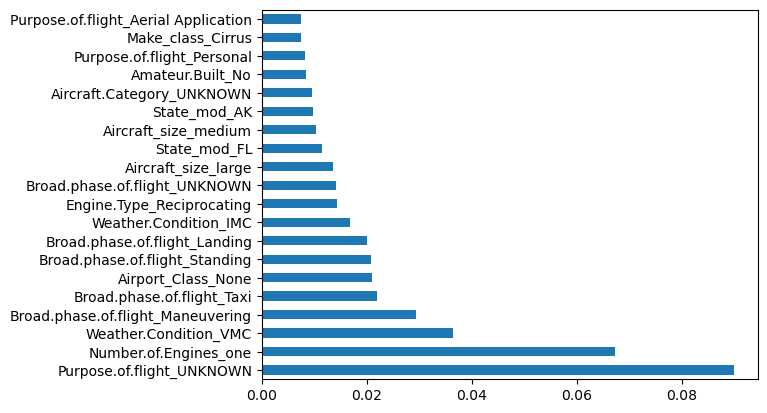

In [384]:
(pd.Series(model1_xgb.feature_importances_, index=X1_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

### XGBOOST dla col Aircraft Damage ze SMOTE

In [385]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X1_train, y1_train)
X1_2_train, X1_2_val, y1_2_train, y1_2_val = train_test_split(X_train_smote, y_train_smote, train_size=0.6, random_state=101)
eval_set = [(X1_2_train, y1_2_train), (X1_2_val, y1_2_val)]
eval_metric = ['merror','mlogloss','auc']
model1_xgb_smote = xgb.XGBClassifier(n_estimators = 2000, max_depth =5,num_class=3,
                               objective='multi:softprob',early_stopping_rounds=10,eval_metric=eval_metric)


In [396]:
X_train_smote.shape

(139059, 161)

In [398]:
y_train_smote.shape

(139059,)

In [399]:
X1_2_train.shape

(83435, 161)

In [400]:
X1_2_val.shape

(55624, 161)

In [401]:
y1_2_train.shape

(83435,)

In [402]:
y1_2_val.shape

(55624,)

In [386]:
start =time.time()

model1_xgb_smote.fit(X_train_smote, y_train_smote, eval_set=eval_set, verbose = 0)

end = time.time()
print("time: ", end -start)

time:  248.22909903526306


In [659]:
results_smote = model1_xgb_smote.evals_result()
epochs = len(results_smote['validation_0']['merror'])
x_axis = range(0, epochs)

In [395]:
results_smote

{'validation_0': OrderedDict([('merror',
               [0.32910649008209986,
                0.3142326361838557,
                0.3039491819979625,
                0.2966141307604722,
                0.29632648169233533,
                0.2928866782525319,
                0.2862827350632229,
                0.27747348235153113,
                0.27034218253730447,
                0.265883621981183,
                0.26074189488823635,
                0.25880026367831244,
                0.2557200215736801,
                0.2505063822136993,
                0.2453406843650746,
                0.23969557140288847,
                0.2344579612872296,
                0.2312698507820459,
                0.22754239827410558,
                0.2248816443938395,
                0.22182537304488523,
                0.2193324144543657,
                0.21511356145502486,
                0.21252471984179302,
                0.21088272307784503,
                0.20816204230838378,
           

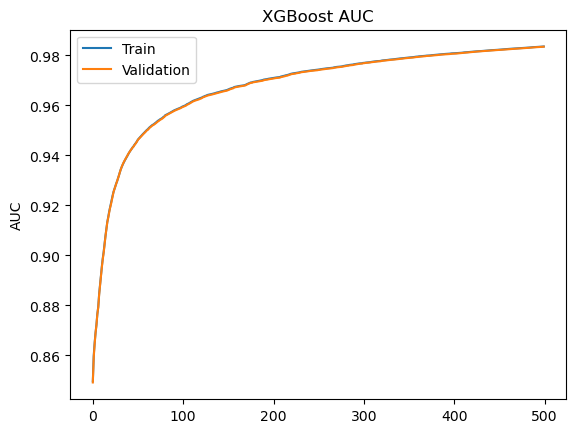

In [660]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote['validation_0']['auc'], label='Train')
ax.plot(x_axis, results_smote['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

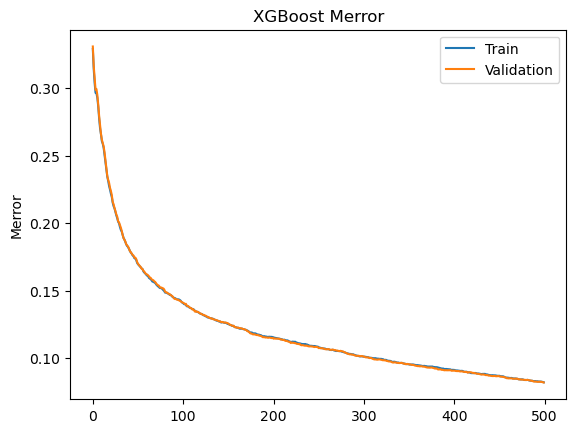

In [661]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote['validation_0']['merror'], label='Train')
ax.plot(x_axis, results_smote['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Merror')
plt.title('XGBoost Merror')
plt.show()

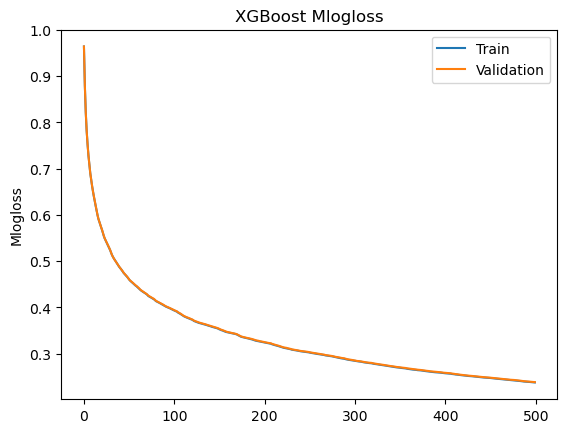

In [662]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results_smote['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Mlogloss')
plt.title('XGBoost Mlogloss')
plt.show()

In [663]:
pred1_xgb_smote = model1_xgb_smote.predict(X1_test)

In [664]:
print('Accuracy Score: ', accuracy_score(y1_test,pred1_xgb_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_test, pred1_xgb_smote))
print('Confusion Matrix: \n', confusion_matrix(y1_test, pred1_xgb_smote))
print('Classification Report: \n', classification_report(y1_test, pred1_xgb_smote))

Accuracy Score:  0.789242151569686
Balanced_accuracy Score:  0.5153615991993323
Confusion Matrix: 
 [[ 1135    11  1896]
 [   23    96   254]
 [  903    75 10610]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.37      0.44      3042
           1       0.53      0.26      0.35       373
           2       0.83      0.92      0.87     11588

    accuracy                           0.79     15003
   macro avg       0.64      0.52      0.55     15003
weighted avg       0.77      0.79      0.77     15003



<AxesSubplot:>

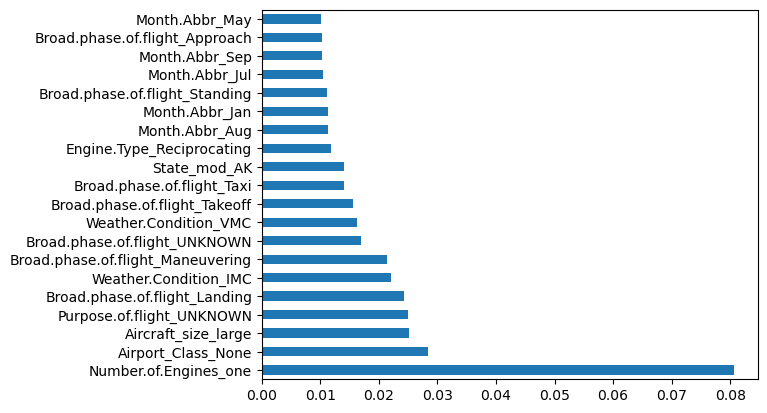

In [406]:
(pd.Series(model1_xgb_smote.feature_importances_, index=X1_dummies.columns)
   .nlargest(10)
   .plot(kind='bar'))

### AIrcraft Damage as binary (without Minor)

In [496]:
df_US_ml['Aircraft.damage'].value_counts(normalize =True)

Substantial    0.772392
Destroyed      0.202773
Minor          0.024835
Name: Aircraft.damage, dtype: float64

In [497]:
df_US_ml1 =df_US_ml[df_US_ml['Aircraft.damage']!='Minor']

In [666]:
df_US_ml1['Aircraft.damage'].value_counts(normalize =True)

Substantial    0.792063
Destroyed      0.207937
Name: Aircraft.damage, dtype: float64

In [498]:
y1_binary=df_US_ml1['Aircraft.damage']

In [499]:
y1_binary

3601     Substantial
3602     Substantial
3603     Substantial
3604     Substantial
3605     Substantial
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 73152, dtype: object

In [500]:
y1_binary_label = le.fit_transform(y1_binary)

In [501]:
X1_binary = df_US_ml1.drop(columns = ['Aircraft.damage','Target_binary', 'Target_column'], axis=1)

In [503]:
X1_binary_dummies=pd.get_dummies(X1_binary)

In [504]:
X1_bin_train, X1_bin_test, y1_bin_train, y1_bin_test = train_test_split(X1_binary_dummies, y1_binary_label, test_size=0.2, random_state=101, stratify=y1_binary_label)

In [505]:
from sklearn.utils import class_weight
classes_weights_bin = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y1_bin_train)

In [506]:
X1_bin_train.shape

(58521, 161)

In [507]:
y1_bin_train.shape

(58521,)

In [508]:
len(classes_weights)

58521

In [509]:
classes_weights.max()

2.4045114635549347

In [510]:
classes_weights.min()

0.63126725923369

In [511]:
X1_bin_1_train, X1_bin_val, y1_bin_1_train, y1_bin_val = train_test_split(X1_bin_train, y1_bin_train, train_size=0.6, random_state=101)

In [512]:
X1_bin_1_train.shape

(35112, 161)

In [513]:
X1_bin_val.shape

(23409, 161)

In [514]:
y1_bin_1_train.shape

(35112,)

In [515]:
y1_bin_val.shape

(23409,)

In [529]:
eval_set_bin = [(X1_bin_1_train, y1_bin_1_train), (X1_bin_val, y1_bin_val)]
eval_metric_bin = ['error','logloss','auc']

In [557]:
model1_bin_xgb = xgb.XGBClassifier(n_estimators = 1000, max_depth =5,
                               objective='binary:logistic',early_stopping_rounds=10,eval_metric=eval_metric_bin)

In [558]:
start =time.time()

model1_bin_xgb.fit(X1_bin_train, y1_bin_train, eval_set=eval_set_bin,sample_weight=classes_weights_bin, verbose = 0)
           

end = time.time()
print("time: ", end -start)

time:  91.12522482872009


In [559]:
results = model1_bin_xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

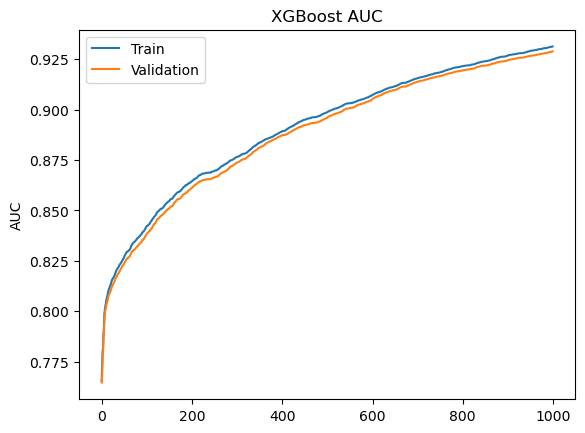

In [560]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

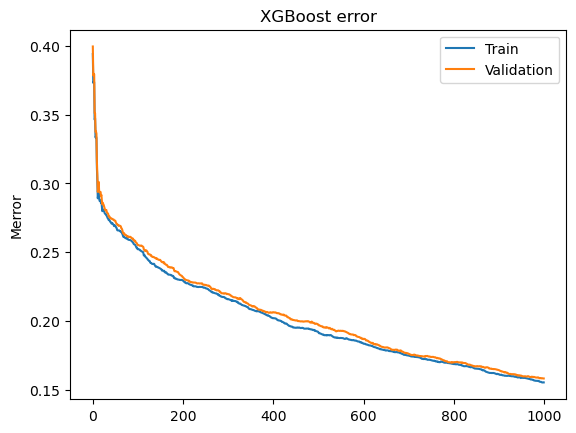

In [561]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Validation')
ax.legend()
plt.ylabel('Merror')
plt.title('XGBoost error')
plt.show()

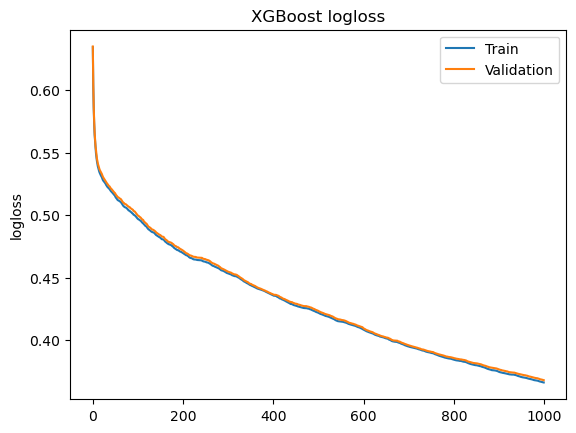

In [562]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [563]:
pred1_bin_xgb = model1_bin_xgb.predict(X1_bin_test)

In [564]:
print('Accuracy Score: ', accuracy_score(y1_bin_test,pred1_bin_xgb))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_bin_test, pred1_bin_xgb))
print('Confusion Matrix: \n', confusion_matrix(y1_bin_test, pred1_bin_xgb))
print('Classification Report: \n', classification_report(y1_bin_test, pred1_bin_xgb))

Accuracy Score:  0.7410976693322398
Balanced_accuracy Score:  0.6944979281345995
Confusion Matrix: 
 [[1870 1172]
 [2616 8973]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.61      0.50      3042
           1       0.88      0.77      0.83     11589

    accuracy                           0.74     14631
   macro avg       0.65      0.69      0.66     14631
weighted avg       0.79      0.74      0.76     14631



<AxesSubplot:>

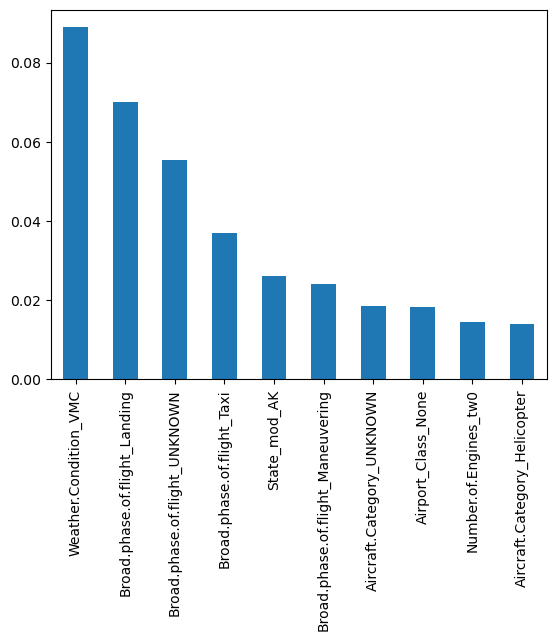

In [667]:
(pd.Series(model1_bin_xgb.feature_importances_, index=X1_dummies.columns)
   .nlargest(10)
   .plot(kind='bar'))

In [603]:
pred1_xgb_train_proba = model1_bin_xgb.predict_proba(X1_bin_train)[:,1]
pred1_xgb_test_proba = model1_bin_xgb.predict_proba(X1_bin_test)[:,1]

In [605]:
roc_auc_score(y1_bin_train,pred1_xgb_train_proba)


0.9302892225765471

In [606]:
roc_auc_score(y1_bin_test,pred1_xgb_test_proba)

0.768390517907633

In [607]:
fpr_train, tpr_train, thresholds =  roc_curve(y1_bin_train,pred1_xgb_train_proba)
fpr_test, tpr_test, thresholds = roc_curve(y1_bin_test,pred1_xgb_test_proba)

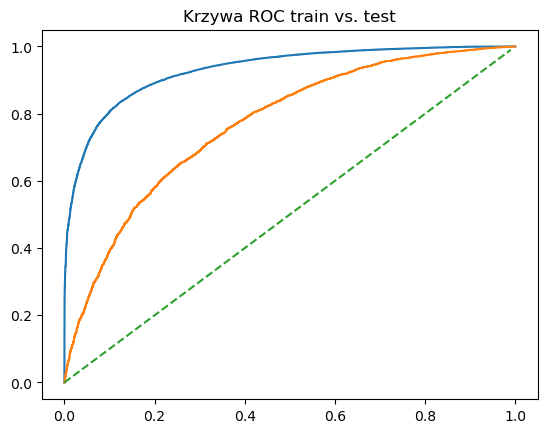

In [608]:
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.title('Krzywa ROC train vs. test')
plt.show()

In [482]:
data_dm = xgb.DMatrix(data=X1_binary_dummies.values, label=y1_binary_label)

In [483]:
data_dm

In [493]:
# auc == AUROC == pole pod krzywą ROC

params = {"n_estimators": 1000,
    "objective": "binary:logistic", 
    "max_depth": 5, 
    "booster": "gbtree",
    "learning_rate": 0.8, # DEFAULT: 0.3,
     "early_stopping_rounds":10     
}


cv_results = xgb.cv(
    dtrain=data_dm, 
    params=params, 
    nfold=4, 
    num_boost_round=250, metrics=["error", "auc"], as_pandas=True) #metrics="auc"


cv_results

[13:46:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

[13:46:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

[13:46:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

[13:46:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.



,train-error-mean,train-error-std,train-auc-mean,train-auc-std,test-error-mean,test-error-std,test-auc-mean,test-auc-std
0,0.181298,0.000899,0.765390,0.001472,0.181841,0.002457,0.761734,0.003852
1,0.183604,0.002419,0.782703,0.003022,0.184370,0.003531,0.778861,0.003805
2,0.180961,0.001015,0.791803,0.001569,0.182374,0.002603,0.786538,0.004537
3,0.178742,0.000500,0.797846,0.001197,0.180966,0.002598,0.791508,0.004956
4,0.177288,0.001045,0.800503,0.001375,0.179421,0.001662,0.792976,0.005147
...,...,...,...,...,...,...,...,...
245,0.126504,0.000670,0.901874,0.000831,0.192517,0.002848,0.768685,0.006421
246,0.126517,0.000611,0.902108,0.000790,0.192503,0.002963,0.768710,0.006388
247,0.126444,0.000624,0.902282,0.000798,0.192558,0.003122,0.768714,0.006273
248,0.126367,0.000460,0.902433,0.000810,0.192503,0.003116,0.768658,0.006276


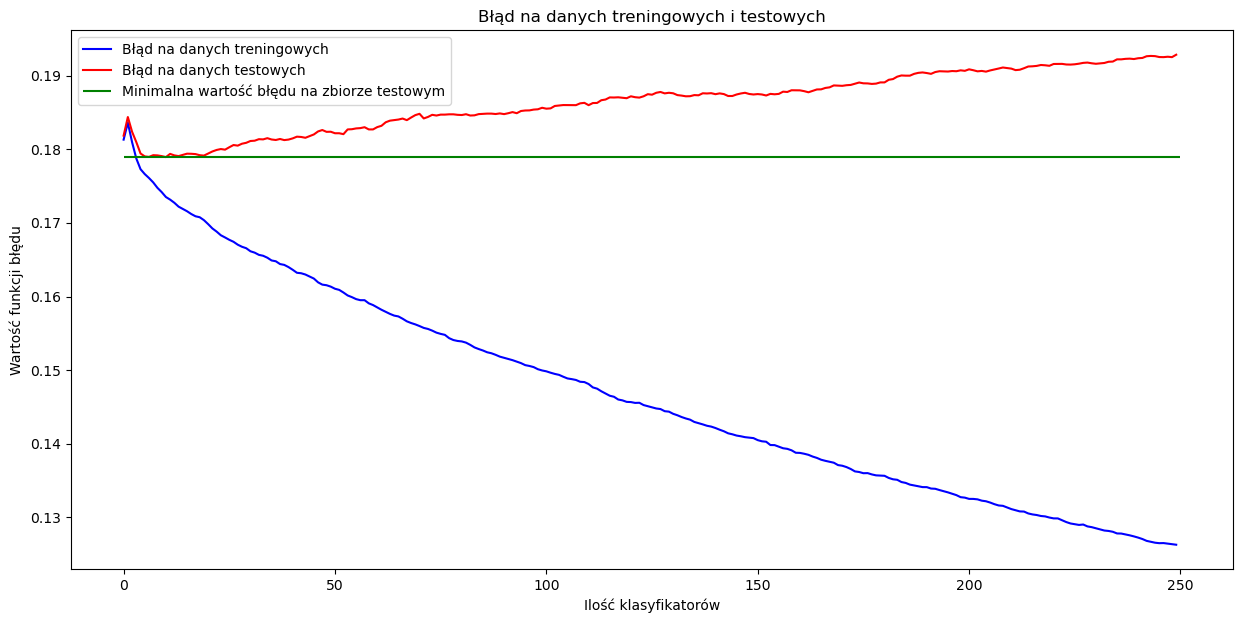

In [494]:
plt.figure(figsize=(15, 7))
plt.title("Błąd na danych treningowych i testowych")
plt.plot(cv_results["train-error-mean"], color="b", label='Błąd na danych treningowych')
plt.plot(cv_results["test-error-mean"], color="r", label='Błąd na danych testowych')
# plt.ylim((0., 0.2))
plt.hlines([cv_results["test-error-mean"].min()], xmin=0, xmax=250, color="g", label='Minimalna wartość błędu na zbiorze testowym')
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość funkcji błędu")
plt.legend()

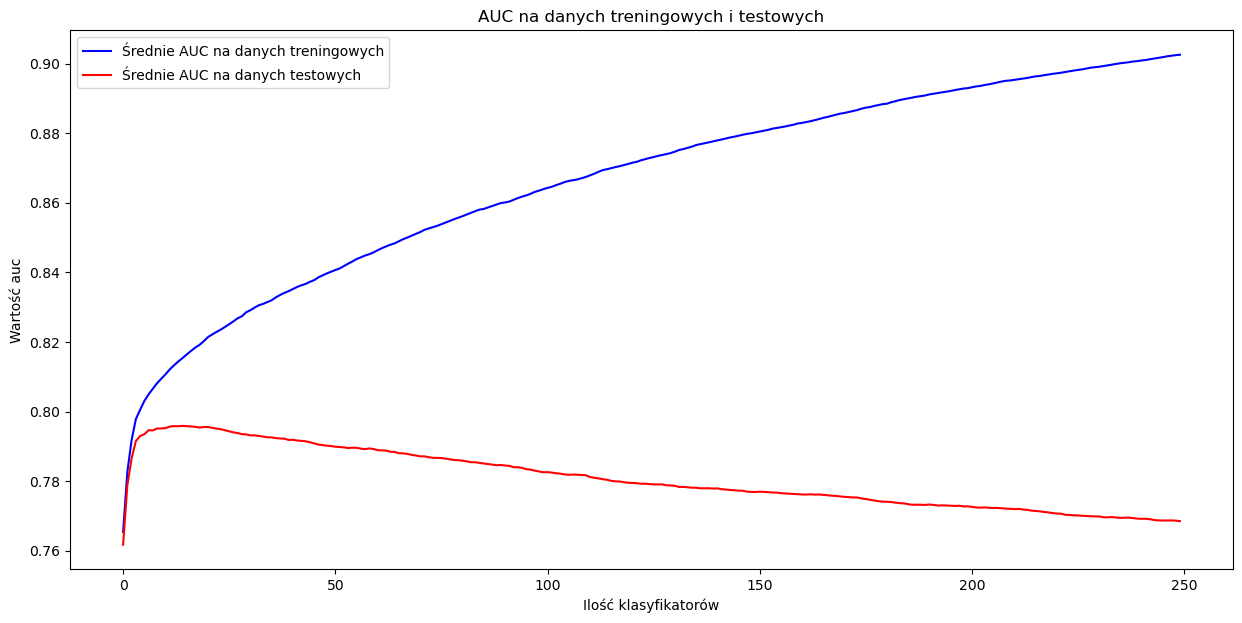

In [495]:
plt.figure(figsize=(15, 7))
plt.title("AUC na danych treningowych i testowych")
plt.plot(cv_results["train-auc-mean"], color="b", label='Średnie AUC na danych treningowych')
plt.plot(cv_results["test-auc-mean"], color="r", label = 'Średnie AUC na danych testowych')
# plt.ylim((0., 0.2))
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość auc")
plt.legend()

In [ ]:
(pd.Series(model1_xgb_smote.feature_importances_, index=X1_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))

### Aircraft Damage Binary ze SMOTE

In [685]:
X1_bin_train, X1_bin_test, y1_bin_train, y1_bin_test = train_test_split(X1_binary_dummies, y1_binary_label, test_size=0.2, random_state=101, stratify=y1_binary_label)

In [686]:
smote = SMOTE()
X1_bin_train_smote, y1_bin_train_smote = smote.fit_resample(X1_bin_train, y1_bin_train)
X1_3_train, X1_3_val, y1_3_train, y1_3_val = train_test_split(X1_bin_train_smote, y1_bin_train_smote, train_size=0.8, random_state=101)
eval_set_bin = [(X1_3_train, y1_3_train), (X1_3_val, y1_3_val)]
eval_metric_bin = ['error','logloss','auc']
model1_bin_xgb_smote = xgb.XGBClassifier(n_estimators = 2000, max_depth =5,
                               objective='binary:logistic',early_stopping_rounds=10,eval_metric=eval_metric_bin)

In [687]:
start =time.time()

model1_bin_xgb_smote.fit(X1_bin_train_smote, y1_bin_train_smote, eval_set=eval_set_bin, verbose = 0)

end = time.time()
print("time: ", end -start)

time:  291.8495445251465


In [688]:
results_smote_bin1 = model1_bin_xgb_smote.evals_result()
epochs = len(results_smote_bin1['validation_0']['error'])
x_axis = range(0, epochs)

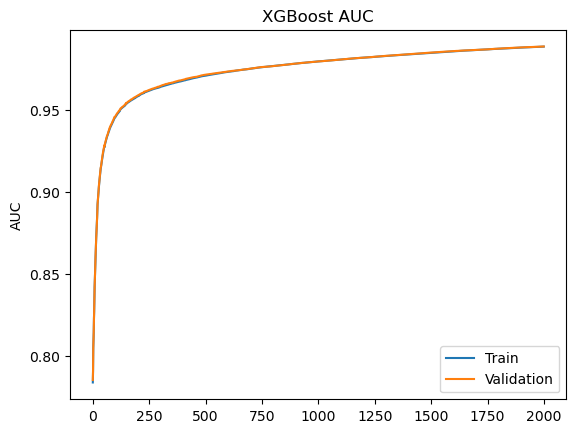

In [689]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote_bin1['validation_0']['auc'], label='Train')
ax.plot(x_axis, results_smote_bin1['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

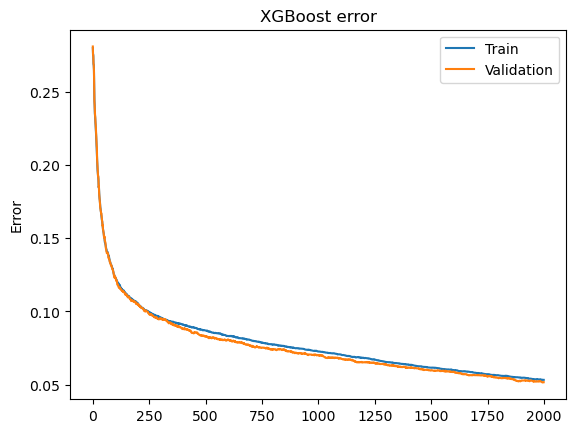

In [690]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote_bin1['validation_0']['error'], label='Train')
ax.plot(x_axis, results_smote_bin1['validation_1']['error'], label='Validation')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost error')
plt.show()

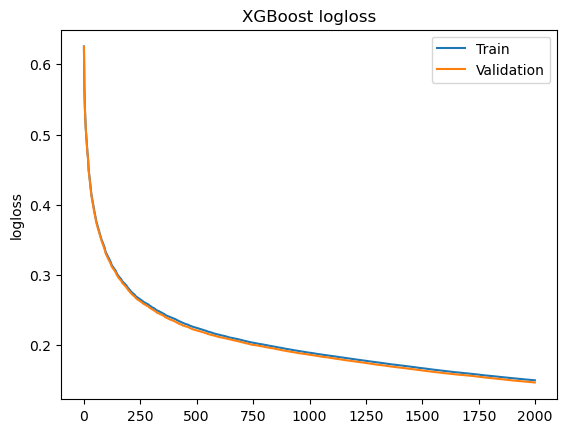

In [691]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote_bin1['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results_smote_bin1['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [692]:
pred1_bin_xgb_smote = model1_bin_xgb_smote.predict(X1_bin_test)

In [693]:
print('Accuracy Score: ', accuracy_score(y1_bin_test,pred1_bin_xgb_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y1_bin_test, pred1_bin_xgb_smote))
print('Confusion Matrix: \n', confusion_matrix(y1_bin_test, pred1_bin_xgb_smote))
print('Classification Report: \n', classification_report(y1_bin_test, pred1_bin_xgb_smote))

Accuracy Score:  0.8024058505912104
Balanced_accuracy Score:  0.6396156628837487
Confusion Matrix: 
 [[ 1098  1944]
 [  947 10642]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.36      0.43      3042
           1       0.85      0.92      0.88     11589

    accuracy                           0.80     14631
   macro avg       0.69      0.64      0.66     14631
weighted avg       0.78      0.80      0.79     14631



<AxesSubplot:>

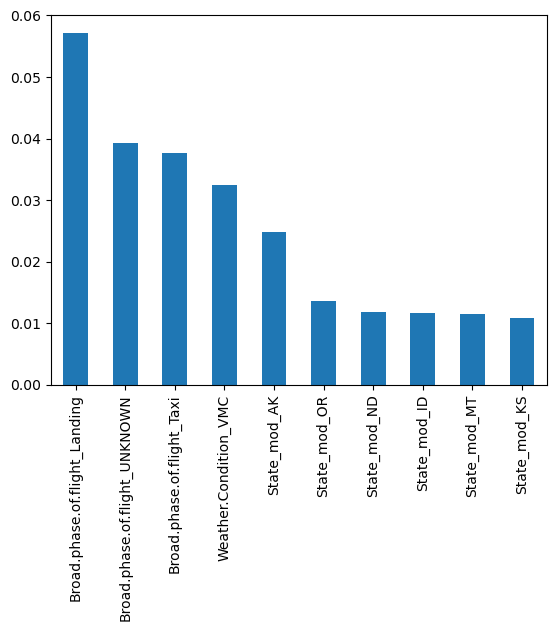

In [694]:
(pd.Series(model1_bin_xgb_smote.feature_importances_, index=X1_binary_dummies.columns)
   .nlargest(10)
   .plot(kind='bar'))

In [696]:
pred1_bin_xgb_train_proba = model1_bin_xgb_smote.predict_proba(X1_bin_train)[:,1]
pred1_bin_xgb_test_proba = model1_bin_xgb_smote.predict_proba(X1_bin_test)[:,1]

In [697]:
roc_auc_score(y1_bin_train,pred1_bin_xgb_train_proba)

0.9578161197994768

In [698]:
roc_auc_score(y1_bin_test,pred1_bin_xgb_test_proba)

0.754468774346709

In [699]:
fpr_train, tpr_train, thresholds =  roc_curve(y1_bin_train,pred1_bin_xgb_train_proba )
fpr_test, tpr_test, thresholds = roc_curve(y1_bin_test,pred1_bin_xgb_test_proba)

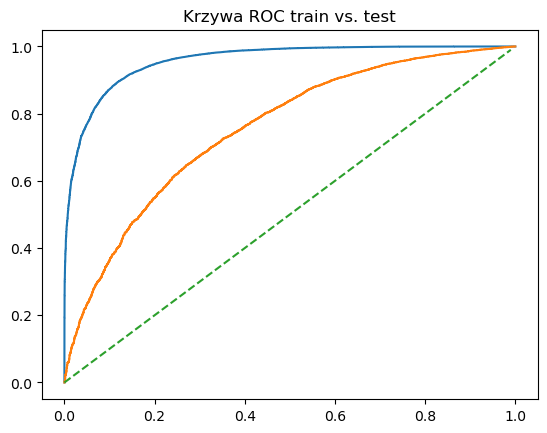

In [700]:
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.title('Krzywa ROC train vs. test')
plt.show()

### second dataset with Target Binary as target column

In [566]:
df_US_ml['Target_binary'].value_counts(normalize =True)

Minor_Uninjured    0.690635
Fatal_Injured      0.309365
Name: Target_binary, dtype: float64

In [567]:
y2=df_US_ml['Target_binary']

In [568]:
X2 = df_US_ml.drop(columns = ['Aircraft.damage','Target_binary', 'Target_column'], axis=1)

In [ ]:
#enc2 = OneHotEncoder(handle_unknown='ignore')
#enc2.fit(X2)

In [ ]:
from sklearn.model_selection import train_test_split

In [569]:
X2_dummies=pd.get_dummies(X2)

In [570]:
y2_label = le.fit_transform(y2)

In [571]:
y2_label

array([1, 1, 1, ..., 1, 0, 1])

In [572]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_dummies, y2_label, 
                                                        test_size=0.2, random_state=101, stratify=y2_label)

### model 2 XGBOOST

In [573]:
from sklearn.utils import class_weight
classes_weights2 = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y2_train)

In [574]:
X2_1_train, X2_val, y2_1_train, y2_val = train_test_split(X2_train, y2_train, train_size=0.6, random_state=101)

In [575]:
eval_set2 = [(X2_1_train, y2_1_train), (X2_val, y2_val)]
eval_metric2 = ['error','logloss','auc']

In [590]:
model2_bin_xgb = xgb.XGBClassifier(n_estimators = 2000, max_depth =5,
                               objective='binary:logistic',early_stopping_rounds=10,eval_metric=eval_metric2)

In [591]:
start =time.time()

model2_bin_xgb.fit(X2_train, y2_train, eval_set=eval_set2,sample_weight=classes_weights2, verbose = 0)
           

end = time.time()
print("time: ", end -start)

time:  188.63489961624146


In [592]:
results = model2_bin_xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

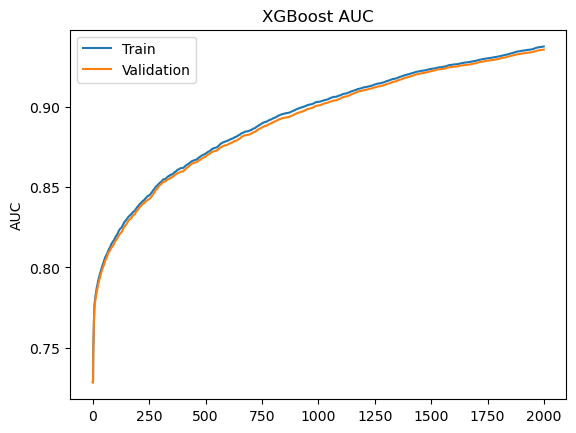

In [593]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

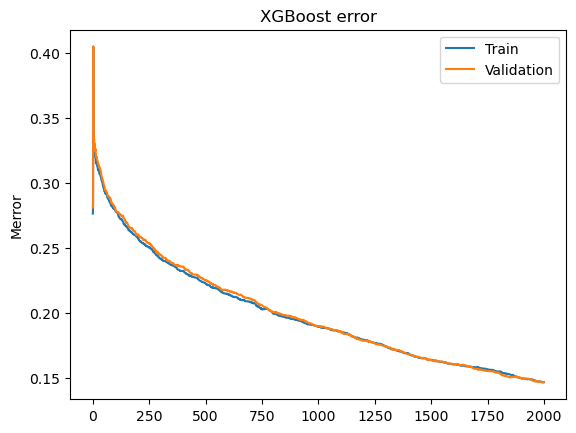

In [594]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Validation')
ax.legend()
plt.ylabel('Merror')
plt.title('XGBoost error')
plt.show()

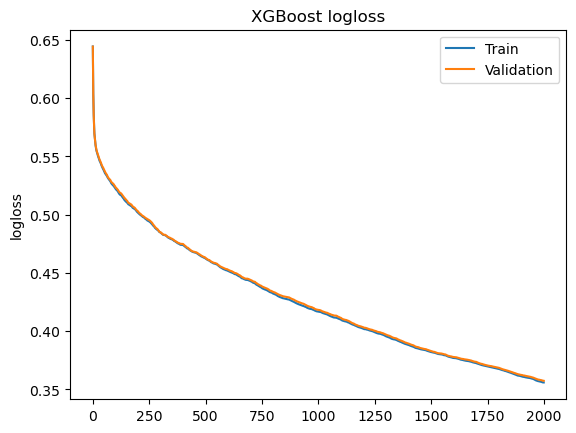

In [595]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [596]:
pred2_bin_xgb = model2_bin_xgb.predict(X2_test)

In [597]:
print('Accuracy Score: ', accuracy_score(y2_test,pred2_bin_xgb))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y2_test, pred2_bin_xgb))
print('Confusion Matrix: \n', confusion_matrix(y2_test, pred2_bin_xgb))
print('Classification Report: \n', classification_report(y2_test, pred2_bin_xgb))

Accuracy Score:  0.6879957341864961
Balanced_accuracy Score:  0.6703302317764663
Confusion Matrix: 
 [[2896 1745]
 [2936 7426]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      4641
           1       0.81      0.72      0.76     10362

    accuracy                           0.69     15003
   macro avg       0.65      0.67      0.66     15003
weighted avg       0.71      0.69      0.70     15003



<AxesSubplot:>

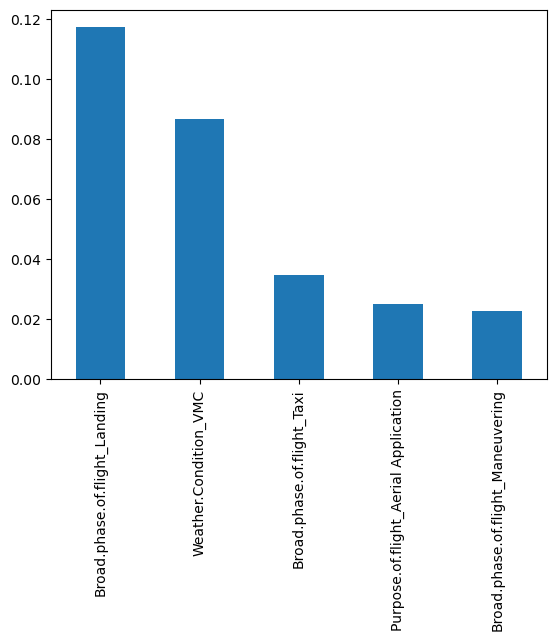

In [598]:
(pd.Series(model2_bin_xgb.feature_importances_, index=X1_dummies.columns)
   .nlargest(5)
   .plot(kind='bar'))

In [599]:
pred2_xgb_train_proba = model2_bin_xgb.predict_proba(X2_train)[:,1]
pred2_xgb_test_proba = model2_bin_xgb.predict_proba(X2_test)[:,1]

In [600]:
roc_auc_score(y2_train,pred2_xgb_train_proba)
roc_auc_score(y2_test,pred2_xgb_test_proba)

0.7410476892492628

In [601]:
fpr_train, tpr_train, thresholds =  roc_curve(y2_train,pred2_xgb_train_proba)
fpr_test, tpr_test, thresholds = roc_curve(y2_test,pred2_xgb_test_proba)

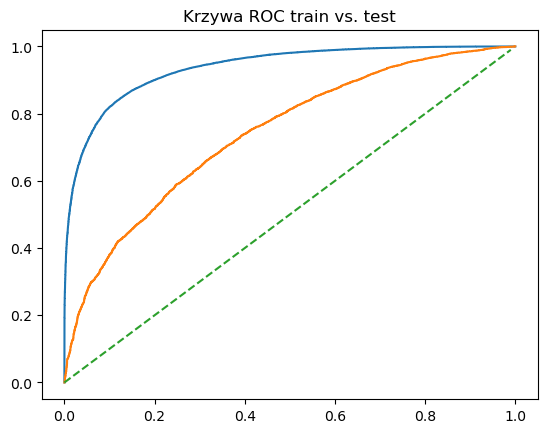

In [602]:
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.title('Krzywa ROC train vs. test')
plt.show()

### Model 2 XGBOOST ze SMOTE

In [701]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_dummies, y2_label, 
                                                        test_size=0.2, random_state=101, stratify=y2_label)

In [703]:
y2_train.shape

(60012,)

In [706]:
smote = SMOTE()
X2_bin_train_smote, y2_bin_train_smote = smote.fit_resample(X2_train, y2_train)
X2_2_train, X2_2_val, y2_2_train, y2_2_val = train_test_split(X2_bin_train_smote, y2_bin_train_smote, train_size=0.8, random_state=101)
eval_set2_smote = [(X2_2_train, y2_2_train), (X2_2_val, y2_2_val)]
eval_metric2_smote = ['error','logloss','auc']
model2_bin_xgb_smote = xgb.XGBClassifier(n_estimators = 2000, max_depth =5,
                               objective='binary:logistic',early_stopping_rounds=10,eval_metric=eval_metric_bin)

In [707]:
start =time.time()

model2_bin_xgb_smote.fit(X2_bin_train_smote, y2_bin_train_smote, eval_set=eval_set2_smote, verbose = 0)

end = time.time()
print("time: ", end -start)

time:  261.3140287399292


In [708]:
results_smote_bin2 = model2_bin_xgb_smote.evals_result()
epochs = len(results_smote_bin2['validation_0']['error'])
x_axis = range(0, epochs)

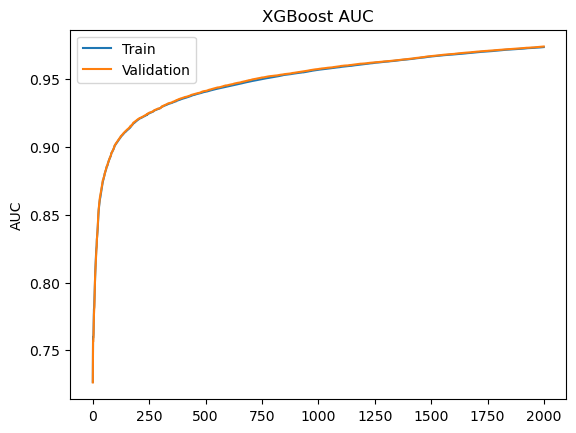

In [709]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote_bin2['validation_0']['auc'], label='Train')
ax.plot(x_axis, results_smote_bin2['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

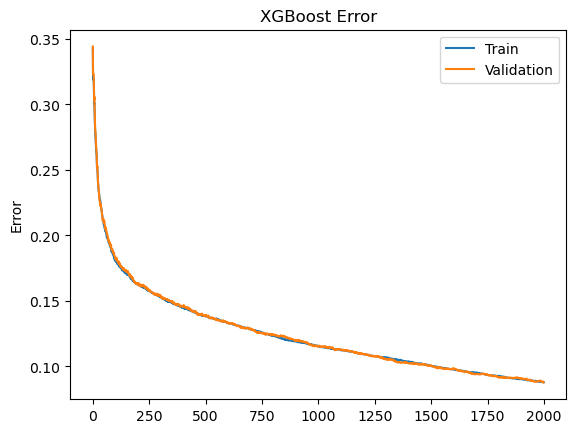

In [710]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote_bin2['validation_0']['error'], label='Train')
ax.plot(x_axis, results_smote_bin2['validation_1']['error'], label='Validation')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()

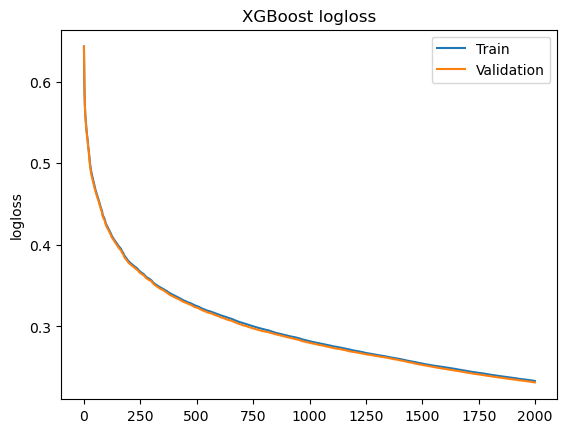

In [711]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote_bin2['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results_smote_bin2['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [712]:
pred2_bin_xgb_smote = model2_bin_xgb_smote.predict(X2_test)

In [713]:
print('Accuracy Score: ', accuracy_score(y2_test,pred2_bin_xgb_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y2_test, pred2_bin_xgb_smote))
print('Confusion Matrix: \n', confusion_matrix(y2_test, pred2_bin_xgb_smote))
print('Classification Report: \n', classification_report(y2_test, pred2_bin_xgb_smote))

Accuracy Score:  0.7178564287142571
Balanced_accuracy Score:  0.6431723016586262
Confusion Matrix: 
 [[2076 2565]
 [1668 8694]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.45      0.50      4641
           1       0.77      0.84      0.80     10362

    accuracy                           0.72     15003
   macro avg       0.66      0.64      0.65     15003
weighted avg       0.70      0.72      0.71     15003



<AxesSubplot:>

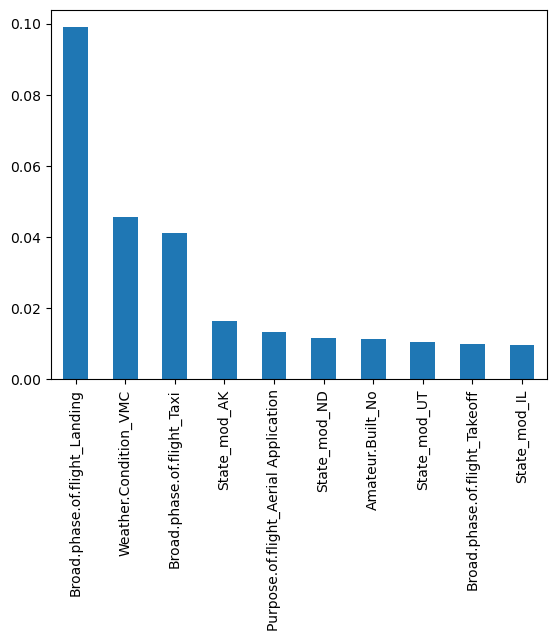

In [714]:
(pd.Series(model2_bin_xgb_smote.feature_importances_, index=X2_dummies.columns)
   .nlargest(10)
   .plot(kind='bar'))

In [715]:
pred2_smote_xgb_train_proba = model2_bin_xgb_smote.predict_proba(X2_train)[:,1]
pred2_smote_xgb_test_proba = model2_bin_xgb_smote.predict_proba(X2_test)[:,1]

In [717]:
roc_auc_score(y2_train,pred2_smote_xgb_train_proba)
roc_auc_score(y2_test,pred2_smote_xgb_test_proba)

0.737607195269241

In [718]:
fpr_train, tpr_train, thresholds =  roc_curve(y2_train,pred2_smote_xgb_train_proba)
fpr_test, tpr_test, thresholds = roc_curve(y2_test,pred2_smote_xgb_test_proba)

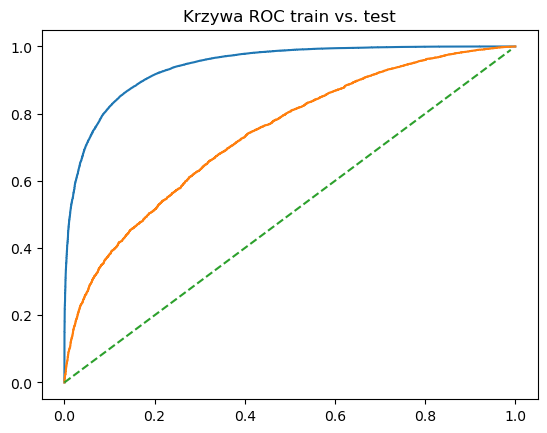

In [719]:
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.title('Krzywa ROC train vs. test')
plt.show()

### model 2 RF

In [ ]:
model2_rf=RandomForestClassifier(n_estimators=200, max_features='auto', random_state =101)

In [ ]:
model2_rf.fit(X2_train, y2_train)

In [ ]:
pred2_rf = model2_rf.predict(X2_test)

In [ ]:
pred2_rf

In [ ]:
confusion_matrix( y2_test, pred2_rf)

In [ ]:
accuracy_score(y2_test, pred2_rf)

In [ ]:
print(classification_report(y2_test, pred2_rf))

In [ ]:
print('Accuracy Score: ', accuracy_score(y2_test,pred2_rf))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y2_test, pred2_rf))
print('Confusion Matrix: \n', confusion_matrix(y2_test, pred2_rf))
print('Classification Report: \n', classification_report(y2_test, pred2_rf))

In [ ]:
(pd.Series(model2_rf.feature_importances_, index=X2_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

In [ ]:
pred2_rf_train_proba = model2_rf.predict_proba(X2_train)[:,1]
pred2_rf_test_proba = model2_rf.predict_proba(X2_test)[:,1]

In [ ]:
pred2_rf_train_proba

In [ ]:
y2_train

In [ ]:
roc_auc_score(y2_train,pred2_rf_train_proba)

In [ ]:
roc_auc_score(y2_test,pred2_rf_test_proba)

In [ ]:
fpr_train, tpr_train, thresholds =  roc_curve(y2_train,pred2_rf_train_proba)
fpr_test, tpr_test, thresholds = roc_curve(y2_test,pred2_rf_test_proba)

In [ ]:
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.title('Krzywa ROC train vs. test')
plt.show()

### RF wit grid searchCV

In [ ]:
n_estimators=[50,100,200]
max_features = [2,3]
bootstrap = [True,False]
oob_score=[True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

In [ ]:
model2_rf1=RandomForestClassifier()

In [ ]:
grid2_rf1 = GridSearchCV(model2_rf1, param_grid)

In [ ]:
grid2_rf1.fit(X2_train, y2_train)

In [ ]:
grid2_rf1.best_params_

In [ ]:
pred2_gscv_rf = grid2_rf1.predict(X2_test)

In [ ]:
pred2_gscv_rf = le.fit_transform(pred2_gscv_rf)

In [ ]:
print('Accuracy Score: ', accuracy_score(y2_test,pred2_gscv_rf))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y2_test, pred2_gscv_rf))
print('Confusion Matrix: \n', confusion_matrix(y2_test, pred2_gscv_rf))
print('Classification Report: \n', classification_report(y2_test, pred2_gscv_rf))

In [ ]:
(pd.Series(model2_rf.feature_importances_, index=X2_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

### third dataset with Target Column as target column

In [611]:
df_US_ml['Target_column'].value_counts(normalize=True)

Uninjured    0.556302
Injured      0.257735
Fatal        0.185963
Name: Target_column, dtype: float64

In [612]:
y3=df_US_ml['Target_column']

In [613]:
X3 = df_US_ml.drop(columns = ['Aircraft.damage','Target_binary', 'Target_column'], axis=1)

enc3 = OneHotEncoder(handle_unknown='ignore')
enc3.fit(X3)

In [614]:
X3_dummies=pd.get_dummies(X3)

In [615]:
y3_label = le.fit_transform(y3)

In [616]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_dummies, y3_label, test_size=0.2, random_state=0, stratify=y3_label)

#### Model 3 RF

In [ ]:
model3_rf=RandomForestClassifier(n_estimators=200, max_features='auto', random_state =101)
model3_rf.fit(X3_train, y3_train)

In [ ]:
pred3_rf = model3_rf.predict(X3_test)

In [ ]:
print('Accuracy Score: ', accuracy_score(y2_test,pred2_xgb))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y2_test, pred2_xgb))
print('Confusion Matrix: \n', confusion_matrix(y2_test, pred2_xgb))
print('Classification Report: \n', classification_report(y2_test, pred2_xgb))

In [ ]:
print(classification_report(y3_test, pred3_rf))

In [ ]:
(pd.Series(model3_rf.feature_importances_, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

### with Grid Search CV

In [ ]:
n_estimators=[50,100,200]
max_features = [2,3, 4]
bootstrap = [True,False]
oob_score=[True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

In [ ]:
model3_rf1=RandomForestClassifier()

In [ ]:
grid3_rf1 = GridSearchCV(model3_rf1, param_grid)

In [ ]:
grid3_rf1.fit(X3_train, y3_train)

In [ ]:
grid3_rf1.best_params_

In [ ]:
pred3_gscv_rf = grid3_rf1.predict(X3_test)

In [ ]:
pred3_gscv_rf = le.fit_transform(pred3_gscv_rf)

In [ ]:
print(classification_report(y3_test,pred3_gscv_rf))

In [ ]:
grid3_rf1

In [ ]:
print('Accuracy Score: ', accuracy_score(y3_test,pred3_gscv_rf))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y3_test, pred3_gscv_rf))
print('Confusion Matrix: \n', confusion_matrix(y3_test, pred3_gscv_rf))
print('Classification Report: \n', classification_report(y3_test, pred3_gscv_rf))

In [ ]:
(pd.Series(grid3_rf1.feature_importances_, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

#### model 3 XGBOOST

In [632]:
from sklearn.utils import class_weight
classes_weights3 = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y3_train)

In [633]:
X3_1_train, X3_val, y3_1_train, y3_val = train_test_split(X3_train, y3_train, train_size=0.8, random_state=101)

In [634]:
eval_set3 = [(X3_1_train, y3_1_train), (X3_val, y3_val)]
eval_metric3 = ['merror','mlogloss','auc']

In [638]:
model3_xgb = xgb.XGBClassifier(n_estimators = 2000, max_depth =5,
                               objective='multi:softprob',early_stopping_rounds=10,eval_metric=eval_metric3)

In [639]:
start =time.time()

model3_xgb.fit(X3_train, y3_train,eval_set=eval_set3,sample_weight=classes_weights3, verbose = 0)

end = time.time()
print("time: ", end -start)

time:  429.3765141963959


In [640]:
results = model3_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

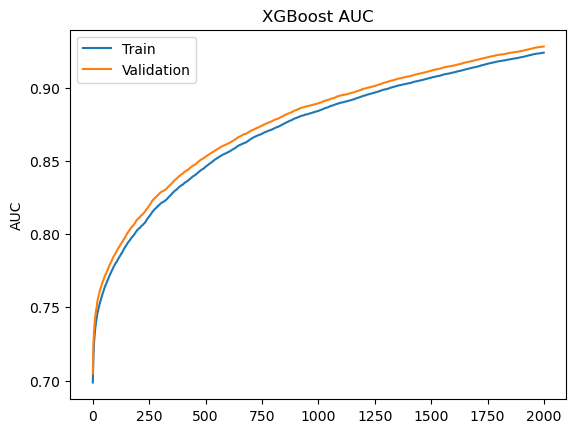

In [641]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

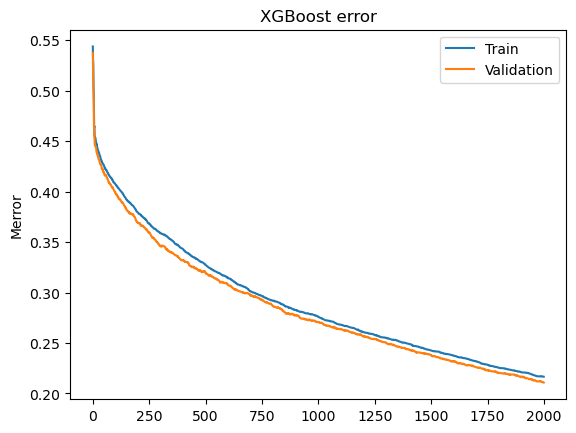

In [642]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Merror')
plt.title('XGBoost error')
plt.show()

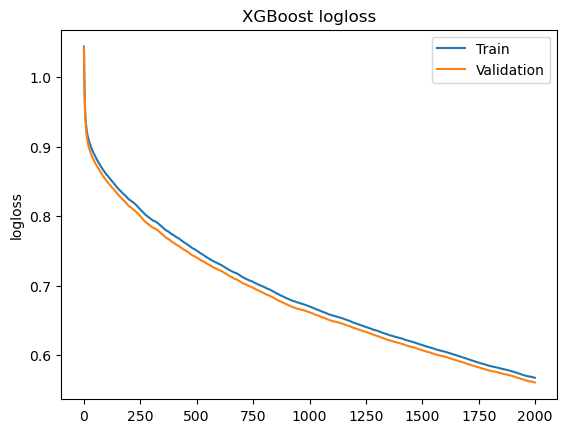

In [643]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [644]:
pred3_xgb = model3_xgb.predict(X3_test)

In [645]:
print('Accuracy Score: ', accuracy_score(y3_test,pred3_xgb))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y3_test, pred3_xgb))
print('Confusion Matrix: \n', confusion_matrix(y3_test, pred3_xgb))
print('Classification Report: \n', classification_report(y3_test, pred3_xgb))

Accuracy Score:  0.5467573152036259
Balanced_accuracy Score:  0.5236709842755104
Confusion Matrix: 
 [[1532  777  481]
 [ 859 1604 1404]
 [1079 2200 5067]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.55      0.49      2790
           1       0.35      0.41      0.38      3867
           2       0.73      0.61      0.66      8346

    accuracy                           0.55     15003
   macro avg       0.51      0.52      0.51     15003
weighted avg       0.58      0.55      0.56     15003



In [628]:
print(classification_report(y3_test, pred3_xgb))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50      2790
           1       0.35      0.43      0.39      3867
           2       0.74      0.59      0.66      8346

    accuracy                           0.55     15003
   macro avg       0.51      0.53      0.51     15003
weighted avg       0.59      0.55      0.56     15003



<AxesSubplot:>

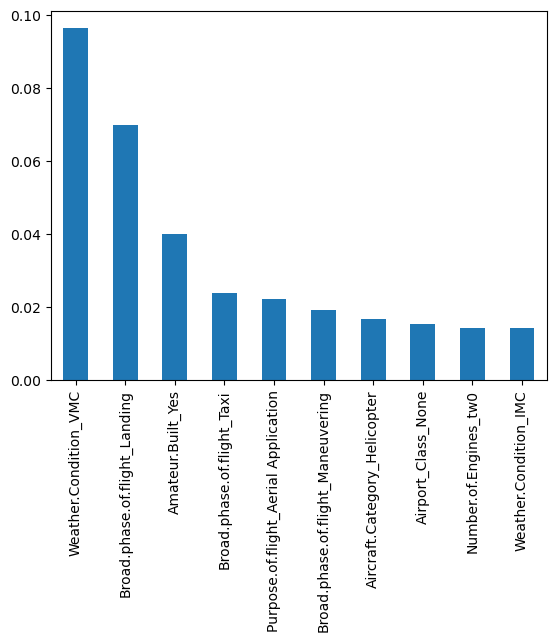

In [646]:
(pd.Series(model3_xgb.feature_importances_, index=X3_dummies.columns)
   .nlargest(10)
   .plot(kind='bar'))  

### XGBOOST dla col Target_Column ze SMOTE

In [650]:
smote = SMOTE()
X3_train_smote, y3_train_smote = smote.fit_resample(X3_train, y3_train)
X3_2_train, X3_2_val, y3_2_train, y3_2_val = train_test_split(X3_train_smote, y3_train_smote, train_size=0.6, random_state=101)
eval_set3_smote = [(X3_2_train, y3_2_train), (X3_2_val, y3_2_val)]
eval_metric3_smote = ['merror','mlogloss','auc']
model3_xgb_smote = xgb.XGBClassifier(n_estimators = 3000, max_depth =5,num_class=3,
                               objective='multi:softprob',early_stopping_rounds=10,eval_metric=eval_metric3_smote)

In [651]:
start =time.time()

model3_xgb_smote.fit(X3_train_smote, y3_train_smote, eval_set=eval_set3_smote, verbose = 0)

end = time.time()
print("time: ", end -start)

time:  1071.158215045929


In [652]:
results_smote3 = model3_xgb_smote.evals_result()
epochs = len(results_smote3['validation_0']['merror'])
x_axis = range(0, epochs)

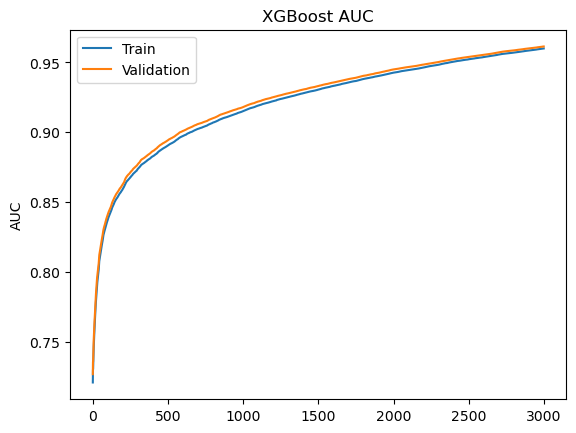

In [653]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote3['validation_0']['auc'], label='Train')
ax.plot(x_axis, results_smote3['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

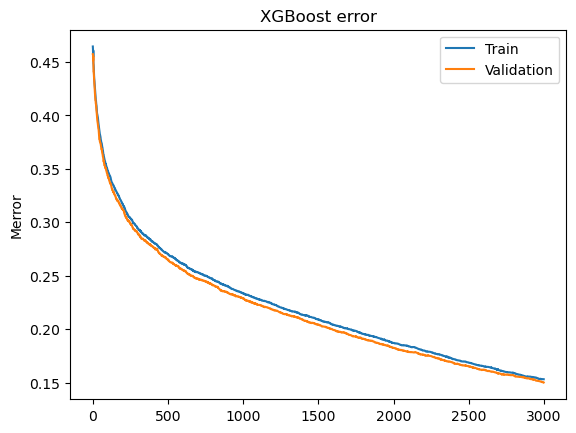

In [654]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote3['validation_0']['merror'], label='Train')
ax.plot(x_axis, results_smote3['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Merror')
plt.title('XGBoost error')
plt.show()

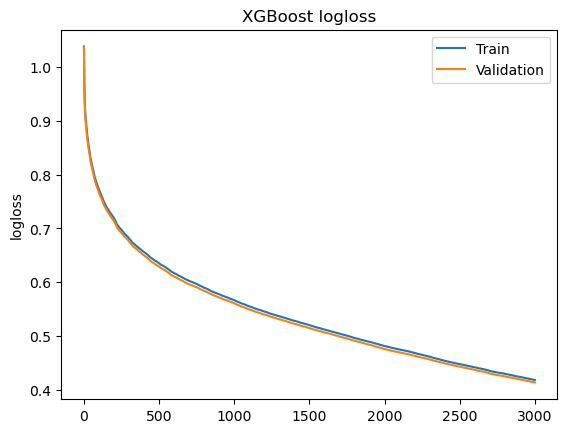

In [655]:
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote3['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results_smote3['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

In [656]:
pred3_xgb_smote = model3_xgb_smote.predict(X3_test)

In [657]:
print('Accuracy Score: ', accuracy_score(y3_test,pred3_xgb_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y3_test, pred3_xgb_smote))
print('Confusion Matrix: \n', confusion_matrix(y3_test, pred3_xgb_smote))
print('Classification Report: \n', classification_report(y3_test, pred3_xgb_smote))

Accuracy Score:  0.5704192494834367
Balanced_accuracy Score:  0.48554622523286195
Confusion Matrix: 
 [[1178  620  992]
 [ 559 1082 2226]
 [ 659 1389 6298]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.42      0.45      2790
           1       0.35      0.28      0.31      3867
           2       0.66      0.75      0.71      8346

    accuracy                           0.57     15003
   macro avg       0.50      0.49      0.49     15003
weighted avg       0.55      0.57      0.56     15003



<AxesSubplot:>

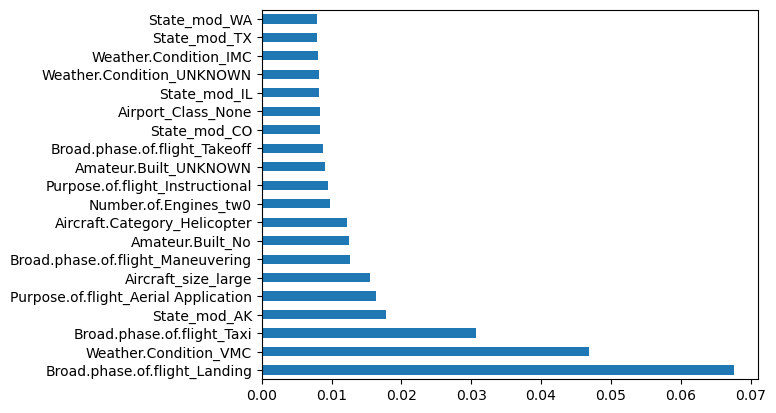

In [658]:
(pd.Series(model3_xgb_smote.feature_importances_, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))

#### kod z XGB CLASSIF


## kod Karoliny
### Dla Target Binary

In [720]:
# podstawowe importy
import numpy as np
import pandas as pd
from time import time

# wizualizacja
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
base_color = sns.color_palette()[0]

import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

# pokazanie wszystkich kolumn i wierszy
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [721]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold

In [722]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

random_state=2023

In [723]:
# dzielimi na train i test
X_train, X_test, y_train, y_test = train_test_split(X2_dummies, y2_label, test_size = 0.2, random_state=random_state, stratify=y2_label)

print("Train samples: {}.".format(X_train.shape[0]))
print("Test samples: {}.".format(X_test.shape[0]))

Train samples: 60012.
Test samples: 15003.


In [724]:
def run_model(model, X, y, cross_val):
    """
    funkcja przeprowadzająca trening na liście modeli

    input:
            model: model estymatora z pakietu sklearn
            X: cechy do przeprowadzenia uczenia
            y: target
            cross_val: rodzaj walidacji
    output/print:
            fbeta_res: wynik fbeta na każdy fold / później uśredniony
            accuracy_res: wynik accuracy na każdy fold / później uśredniony
            cross_val_time: total scoring time dla obu metryk
    """
    model_name = type(model).__name__

    fbeta_scorer = make_scorer(fbeta_score, beta=0.5)
    
    start = time()
    fbeta_res = cross_val_score(model, X, y, cv=cross_val, scoring=fbeta_scorer)
    accuracy_res = cross_val_score(model, X, y, cv=cross_val, scoring='accuracy')
    end = time()
    cross_val_time = end-start
    print("{} fbeta: {:.4f}, accuracy: {:.4f}, time: {}".format(model_name, np.mean(fbeta_res), np.mean(accuracy_res), cross_val_time))

In [725]:
# funkcja rysująca ważność cech
def plot_feature_importances(model, feat_list, ax):

  model_name = type(model).__name__
  skplt.estimators.plot_feature_importances(model, feature_names=df[feat_list].columns,
                                            title=f'{model_name} feature importances', ax=ax)
  plt.xticks(rotation=90)

In [726]:
# zdefiniowanie walidacji
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

# zdefiniowanie prostych modeli
Dummy_model = DummyClassifier(strategy="stratified") 
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier(random_state=random_state)
RF_model = RandomForestClassifier(random_state=random_state)
XGB_model = XGBClassifier(eval_metric='error', random_state=random_state)
Gaussian_model = GaussianNB()
KNN_model = KNeighborsClassifier()


# dodanie modeli do listy, po której będziemy iterowali
models = [Dummy_model, LR_model, DT_model, RF_model, XGB_model, Gaussian_model, KNN_model]

In [727]:
# ewaluacja modeli
for model in models:
    run_model(model, X_train, y_train, skf)

DummyClassifier fbeta: 0.6907, accuracy: 0.5685, time: 0.4047398567199707
LogisticRegression fbeta: 0.7832, accuracy: 0.7403, time: 8.224706888198853
DecisionTreeClassifier fbeta: 0.7600, accuracy: 0.6690, time: 9.902169227600098
RandomForestClassifier fbeta: 0.7860, accuracy: 0.7328, time: 86.83020329475403
XGBClassifier fbeta: 0.7907, accuracy: 0.7454, time: 51.05231308937073
GaussianNB fbeta: 0.7654, accuracy: 0.6355, time: 1.8035130500793457
KNeighborsClassifier fbeta: 0.7699, accuracy: 0.7055, time: 116.33289456367493


In [ ]:
# fit models
for model in models:
    model.fit(X_train, y_train)

In [ ]:
# wyniki predykcji
y_pred_Dummy_model = Dummy_model.predict(X_test)
y_pred_LR_model = LR_model.predict(X_test)
y_pred_DT_model = DT_model.predict(X_test)
y_pred_RF_model = RF_model.predict(X_test)
y_pred_XGB_model = XGB_model.predict(X_test)
y_pred_Gaussian_model = Gaussian_model.predict(X_test)
y_pred_KNN_model = KNN_model.predict(X_test)

In [ ]:
# sprawdzenie fbeta_score dla każdego modelu między wynikami predykcji
# a rzeczywistymi wartościami ze zbioru treningowego
fbeta_Dummy = fbeta_score(y_test, y_pred_Dummy_model, beta=0.5)
fbeta_LR = fbeta_score(y_test, y_pred_LR_model, beta=0.5)
fbeta_DT = fbeta_score(y_test, y_pred_DT_model, beta=0.5)
fbeta_RF = fbeta_score(y_test, y_pred_RF_model, beta=0.5)
fbeta_XGB = fbeta_score(y_test, y_pred_XGB_model, beta=0.5)
fbeta_Gaussian = fbeta_score(y_test, y_pred_Gaussian_model, beta=0.5)
fbeta_KNN = fbeta_score(y_test, y_pred_KNN_model, beta=0.5)

results = [fbeta_Dummy, fbeta_LR, fbeta_DT, fbeta_RF, fbeta_XGB, fbeta_Gaussian, fbeta_KNN]

In [ ]:
X2_dummies.columns

In [ ]:
fig=plt.figure(figsize=(20,10))
for i, model in enumerate(models[2:5]):
    ax=fig.add_subplot(2,4,i+1)
    plot_feature_importances(model, X2_dummies.columns, ax=ax)
fig.tight_layout()
plt.show()

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
fbeta_scorer = make_scorer(fbeta_score, beta=0.5)
parameters = {
    'max_depth': range (2,5,10),
    'n_estimators': range(50,100,250),
    'learning_rate': [0.1, 0.05]
}
grid_obj = GridSearchCV(estimator=XGB_model, param_grid=parameters, scoring=fbeta_scorer, cv=skf)
grid_fit = grid_obj.fit(X_train, y_train)

In [ ]:
best_clf = grid_fit.best_estimator_
y_pred = best_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

In [ ]:
feat_import = grid_fit.best_estimator_.feature_importances_

In [ ]:
(pd.Series(feat_import, index=X2_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

### Ze SMOTE

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_xgb_smote = xgb.XGBClassifier()
model_xgb_smote.fit(X_train_smote, y_train_smote)

In [ ]:
pred_xgb_smote = model_xgb_smote.predict(X_test)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test,pred_xgb_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y_test, pred_xgb_smote))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_xgb_smote))
print('Classification Report: \n', classification_report(y_test, pred_xgb_smote))

In [ ]:
(pd.Series(model_xgb_smote.feature_importances_, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))

### dla Target Column

In [ ]:
# dzielimi na train i test
X_train, X_test, y_train, y_test = train_test_split(X3_dummies, y3_label, test_size = 0.2, random_state=random_state,stratify=y3_label)

print("Train samples: {}.".format(X_train.shape[0]))
print("Test samples: {}.".format(X_test.shape[0]))

In [ ]:
for model in models:
    run_model(model, X_train, y_train, skf)

In [ ]:
# fit models
for model in models:
    model.fit(X_train, y_train)

In [ ]:
# wyniki predykcji
y_pred_Dummy_model = Dummy_model.predict(X_test)
y_pred_LR_model = LR_model.predict(X_test)
y_pred_DT_model = DT_model.predict(X_test)
y_pred_RF_model = RF_model.predict(X_test)
y_pred_XGB_model = XGB_model.predict(X_test)
y_pred_Gaussian_model = Gaussian_model.predict(X_test)
y_pred_KNN_model = KNN_model.predict(X_test)

In [ ]:
# sprawdzenie fbeta_score dla każdego modelu między wynikami predykcji
# a rzeczywistymi wartościami ze zbioru treningowego
fbeta_Dummy = fbeta_score(y_test, y_pred_Dummy_model, beta=0.5)
fbeta_LR = fbeta_score(y_test, y_pred_LR_model, beta=0.5)
fbeta_DT = fbeta_score(y_test, y_pred_DT_model, beta=0.5)
fbeta_RF = fbeta_score(y_test, y_pred_RF_model, beta=0.5)
fbeta_XGB = fbeta_score(y_test, y_pred_XGB_model, beta=0.5)
fbeta_Gaussian = fbeta_score(y_test, y_pred_Gaussian_model, beta=0.5)
fbeta_KNN = fbeta_score(y_test, y_pred_KNN_model, beta=0.5)

results = [fbeta_Dummy, fbeta_LR, fbeta_DT, fbeta_RF, fbeta_XGB, fbeta_Gaussian, fbeta_KNN]

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
fbeta_scorer = make_scorer(fbeta_score, beta=0.5)

parameters = {
    'max_depth': range (2,5,10),
    'n_estimators': range(50,100,200),
    'learning_rate': [0.1,  0.05]
}

#fit_params={"early_stopping_rounds":10, 
            #"eval_metric" :  "error", 
            #"eval_set" : [[X_train, y_train], [X_test, y_test]]}
grid_obj = GridSearchCV(estimator=XGB_model, param_grid=parameters, scoring=fbeta_scorer, cv=skf)
grid_fit = grid_obj.fit(X_train, y_train)#**fit_params)


In [ ]:
best_clf = grid_fit.best_estimator_
y_pred = best_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

In [ ]:
feat_import = grid_fit.best_estimator_.feature_importances_

In [ ]:
(pd.Series(feat_import, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

### Dla Target Column ze SMOTE

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model3_xgb_smote = xgb.XGBClassifier()
model3_xgb_smote.fit(X_train_smote, y_train_smote)


In [ ]:
pred_xgb_smote = model_xgb_smote.predict(X_test)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test,pred_xgb_smote))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y_test, pred_xgb_smote))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_xgb_smote))
print('Classification Report: \n', classification_report(y_test, pred_xgb_smote))

In [ ]:
(pd.Series(model3_xgb_smote.feature_importances_, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))

### dla Aircraft Damage

In [ ]:
# dzielimi na train i test
X_train, X_test, y_train, y_test = train_test_split(X1_dummies, y1_label, test_size = 0.2, random_state=random_state, stratify=y1_label)

print("Train samples: {}.".format(X_train.shape[0]))
print("Test samples: {}.".format(X_test.shape[0]))

In [ ]:
for model in models:
    run_model(model, X_train, y_train, skf)

In [ ]:
# fit models
for model in models:
    model.fit(X_train, y_train)

In [ ]:
# wyniki predykcji
y_pred_Dummy_model = Dummy_model.predict(X_test)
y_pred_LR_model = LR_model.predict(X_test)
y_pred_DT_model = DT_model.predict(X_test)
y_pred_RF_model = RF_model.predict(X_test)
y_pred_XGB_model = XGB_model.predict(X_test)
y_pred_Gaussian_model = Gaussian_model.predict(X_test)
y_pred_KNN_model = KNN_model.predict(X_test)

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)
fbeta_scorer = make_scorer(fbeta_score, beta=0.5)
parameters = {
    'max_depth': range (1,5,10),
    'n_estimators': range(50,100,200),
    'learning_rate': [0.1, 0.05]
}
grid_obj = GridSearchCV(estimator=XGB_model, param_grid=parameters, scoring=fbeta_scorer, cv=skf)
grid_fit = grid_obj.fit(X_train, y_train)

In [ ]:
best_clf = grid_fit.best_estimator_
y_pred = best_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

In [ ]:
feat_import = grid_fit.best_estimator_.feature_importances_

In [ ]:
(pd.Series(feat_import, index=X1_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))  

#### ze SMOTE

In [ ]:
# dzielimi na train i test
X_train, X_test, y_train, y_test = train_test_split(X1_dummies, y1_label, test_size = 0.2, random_state=random_state, stratify=y1_label)


In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_xgb_smote = xgb.XGBClassifier()
model_xgb_smote.fit(X_train_smote, y_train_smote)


In [ ]:
pred_xgb_smote = model_xgb_smote.predict(X_test)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Balanced_accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

In [ ]:
(pd.Series(model3_xgb_smote.feature_importances_, index=X3_dummies.columns)
   .nlargest(20)
   .plot(kind='barh'))